# Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm.auto as tqdm
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/data-cleaning-historical/Cleaned_HDFCBANK.NS_MAX_NSE.csv')
df.head(5)

,date,close,open,high,low,volume
0,1995-06-14,2.27,2.30,2.30,2.25,2070000.0
1,1995-06-15,2.26,2.28,2.31,2.25,4246000.0
2,1995-06-18,2.26,2.26,2.27,2.22,1798000.0
3,1995-06-19,2.25,2.26,2.26,2.24,2792000.0
4,1995-06-20,2.27,2.33,2.33,2.27,1182000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7885 entries, 0 to 7884
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7885 non-null   object 
 1   close   7885 non-null   float64
 2   open    7885 non-null   float64
 3   high    7885 non-null   float64
 4   low     7885 non-null   float64
 5   volume  7885 non-null   float64
dtypes: float64(5), object(1)
memory usage: 369.7+ KB


In [4]:
df['date']=pd.to_datetime(df['date'])

In [5]:
df.set_index('date',inplace=True)
df.head(5)

,close,open,high,low,volume
date,,,,,
1995-06-14,2.27,2.30,2.30,2.25,2070000.0
1995-06-15,2.26,2.28,2.31,2.25,4246000.0
1995-06-18,2.26,2.26,2.27,2.22,1798000.0
1995-06-19,2.25,2.26,2.26,2.24,2792000.0
1995-06-20,2.27,2.33,2.33,2.27,1182000.0


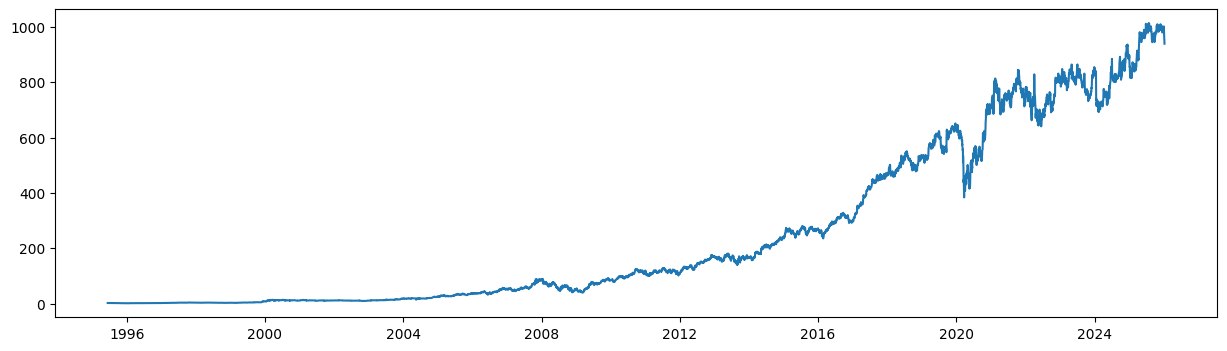

In [6]:
plt.figure(figsize=(15,4))
plt.plot(df.index,df['close'])
plt.savefig('Closing Price vs Years.png')
plt.show()

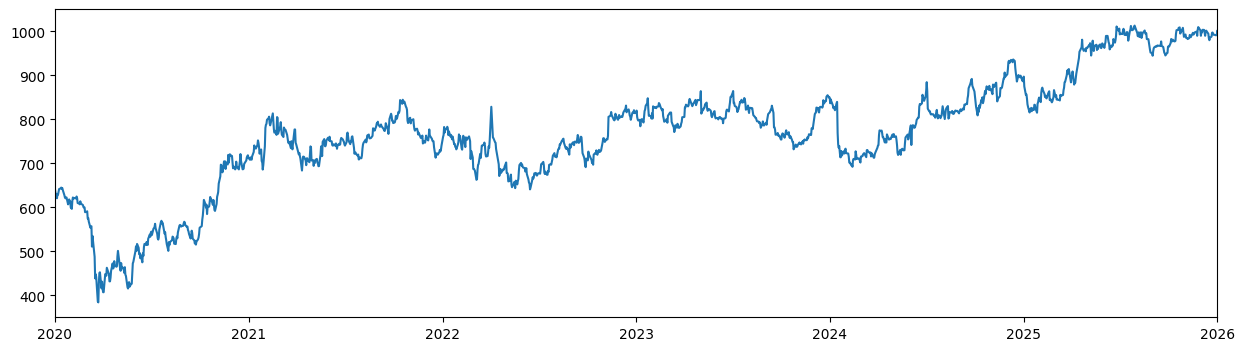

In [7]:
plt.figure(figsize=(15,4))
plt.plot(df.index,df['close'])
plt.xlim(pd.Timestamp('2020-01-01'),pd.Timestamp('2026-01-01'))
plt.ylim(350,1050)
plt.savefig('Closing Price vs Years with limit.png')
plt.show()

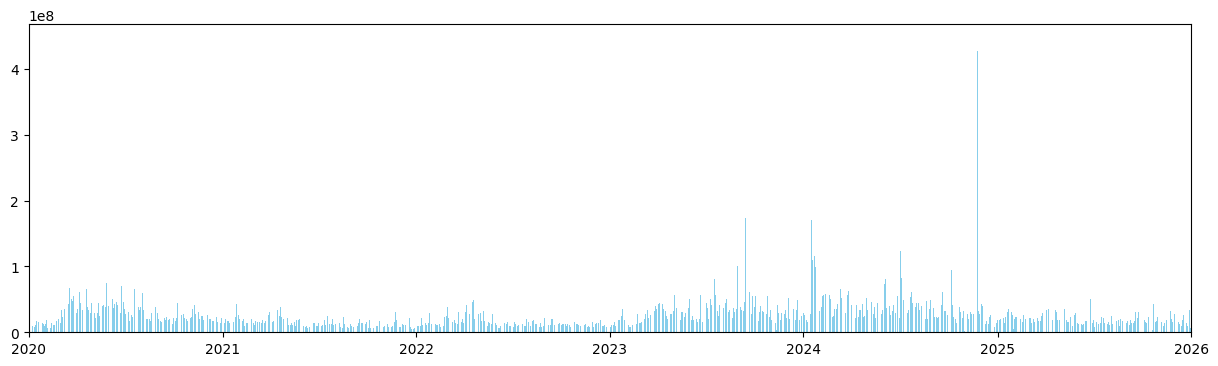

In [8]:
plt.figure(figsize=(15,4))
plt.bar(df.index, df['volume'], color='skyblue', width=0.8)
plt.xlim(pd.Timestamp('2020-01-01'),pd.Timestamp('2026-01-01'))
plt.savefig('Bar chart Volume.png')
plt.show()

# Featuer Adding

In [9]:
delta = df['close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.ewm(com=13, adjust=False, min_periods=14).mean()
avg_loss = loss.ewm(com=13, adjust=False, min_periods=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))
df.iloc[1:14, :]

,close,open,high,low,volume,RSI
date,,,,,,
1995-06-15,2.26,2.28,2.31,2.25,4246000.0,NaN
1995-06-18,2.26,2.26,2.27,2.22,1798000.0,NaN
1995-06-19,2.25,2.26,2.26,2.24,2792000.0,NaN
1995-06-20,2.27,2.33,2.33,2.27,1182000.0,NaN
1995-06-21,2.23,2.27,2.27,2.22,1758000.0,NaN
1995-06-22,2.21,2.25,2.25,2.19,992000.0,NaN
1995-06-25,2.10,2.17,2.17,2.09,1656000.0,NaN
1995-06-26,2.08,2.10,2.10,2.02,1744000.0,NaN
1995-06-27,2.13,2.10,2.15,2.07,2038000.0,NaN


In [10]:
ema_12=df['close'].ewm(span=12,adjust=False).mean()
ema_26=df['close'].ewm(span=26,adjust=False).mean()
df['MACD']=ema_12-ema_26
df['signal']=df['MACD'].ewm(span=9,adjust=False).mean()
df['MACD_Hist']=df['MACD']-df['signal']
sma=df['close'].rolling(window=20).mean()
std=df['close'].rolling(window=20).std()
df['BB_Upper']=sma + (std*2)
df['BB_Lower']=sma - (std*2)
df['BB_Middle']=sma
high_low=df['high']-df['low']
high_close=abs(df['high']-df['close'].shift())
low_close=abs(df['low']-df['close'].shift())
tr=pd.concat([high_low,high_close,low_close],axis=1).max(axis=1)
df['ATR']=tr.rolling(window=14).mean()
df['ROC']=df['close'].pct_change(periods=12) * 100
df['volume_SMA']=df['volume'].rolling(window=20).mean()
df['volume_Ratio']=df['volume']/(df['volume_SMA'] + 1e-10)

In [11]:
df.dropna(inplace=True)

In [12]:
df.head(20)

,close,open,high,low,volume,RSI,MACD,signal,MACD_Hist,BB_Upper,BB_Lower,BB_Middle,ATR,ROC,volume_SMA,volume_Ratio
date,,,,,,,,,,,,,,,,
1995-07-11,2.06,2.09,2.09,2.05,718000.0,35.169211,-0.062864,-0.060939,-0.001925,2.338681,1.888319,2.1135,0.070000,-1.904762,1816900.0,0.395179
1995-07-12,2.08,2.07,2.09,2.05,886000.0,39.104961,-0.056110,-0.059973,0.003863,2.317088,1.890912,2.1040,0.068571,0.000000,1757700.0,0.504068
1995-07-13,2.17,2.10,2.19,2.09,3996000.0,52.947754,-0.043000,-0.056579,0.013579,2.302268,1.896732,2.0995,0.067857,1.877934,1745200.0,2.289709
1995-07-16,2.24,2.25,2.26,2.21,2028000.0,60.473804,-0.026654,-0.050594,0.023940,2.298108,1.898892,2.0985,0.068571,6.161137,1756700.0,1.154437
1995-07-17,2.21,2.23,2.25,2.19,2252000.0,56.316335,-0.015937,-0.043662,0.027726,2.290437,1.902563,2.0965,0.067143,6.763285,1729700.0,1.301960
1995-07-18,2.21,2.19,2.22,2.19,1176000.0,56.316335,-0.007358,-0.036401,0.029043,2.277751,1.909249,2.0935,0.065714,11.055276,1729400.0,0.680005
1995-07-19,2.23,2.25,2.26,2.22,1352000.0,58.521123,0.001042,-0.028913,0.029955,2.277751,1.909249,2.0935,0.065714,13.197970,1709100.0,0.791060
1995-07-20,2.20,2.20,2.23,2.18,1326000.0,54.109511,0.005218,-0.022087,0.027305,2.275970,1.910030,2.0930,0.061429,11.111111,1725800.0,0.768339
1995-07-23,2.20,2.24,2.24,2.19,1144000.0,54.109511,0.008431,-0.015983,0.024414,2.287137,1.908863,2.0980,0.060714,11.675127,1700200.0,0.672862


# Train Test Split

In [13]:
features_cols=[]

for i in df.columns:
    features_cols.append(i)

print(features_cols)

['close', 'open', 'high', 'low', 'volume', 'RSI', 'MACD', 'signal', 'MACD_Hist', 'BB_Upper', 'BB_Lower', 'BB_Middle', 'ATR', 'ROC', 'volume_SMA', 'volume_Ratio']


In [14]:
train_ratio,val_ratio=.8,.1
n=len(df)

train_end=int(n*train_ratio)
val_end=train_end + int(n * val_ratio)

train_data=df.iloc[:train_end]
val_data=df.iloc[train_end:val_end]
test_data=df.iloc[val_end:]

In [15]:
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(6292, 16)
(786, 16)
(788, 16)


# Data Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
sclar=MinMaxScaler()
train_data=sclar.fit_transform(train_data[features_cols].values)
val_data=sclar.transform(val_data[features_cols].values)
test_data=sclar.transform(test_data[features_cols].values)

# Making Sequences

In [17]:
lookback=30
target=df.columns.get_loc('close')

def make_sequence(array,lookback,target):
    x,y=[],[]
    for i in range(len(array)-lookback-1):
        x.append(array[i:i+lookback])
        y.append(array[i+lookback,target])
    return np.array(x),np.array(y) 

In [18]:
x_train,y_train=make_sequence(train_data,lookback,target)
x_val,y_val=make_sequence(val_data,lookback,target)
x_test,y_test=make_sequence(test_data,lookback,target)

In [19]:
x_train[1]

array([[1.34853308e-03, 1.32667395e-03, 1.35666168e-03, 1.33995428e-03,
        2.20255556e-03, 3.46717545e-01, 4.66151193e-01, 4.86178671e-01,
        3.57182767e-01, 1.25499396e-03, 1.46670919e-03, 1.23595065e-03,
        2.09532045e-03, 2.72658388e-01, 2.82271366e-02, 3.25679827e-02],
       [1.48965863e-03, 1.37349774e-03, 1.51259980e-03, 1.40301096e-03,
        9.93387361e-03, 5.21080278e-01, 4.66573851e-01, 4.86314153e-01,
        3.57955053e-01, 1.23228877e-03, 1.47623188e-03, 1.22875560e-03,
        2.06206140e-03, 2.91889921e-01, 2.79682860e-02, 1.47938825e-01],
       [1.59942295e-03, 1.60761667e-03, 1.62175649e-03, 1.59218097e-03,
        5.04151544e-03, 6.15877800e-01, 4.67100810e-01, 4.86553008e-01,
        3.58778615e-01, 1.22591506e-03, 1.47976645e-03, 1.22715670e-03,
        2.09532045e-03, 3.35753311e-01, 2.82064286e-02, 7.45885628e-02],
       [1.55238110e-03, 1.57640081e-03, 1.60616267e-03, 1.56065264e-03,
        5.59836921e-03, 5.63510653e-01, 4.67446311e-01, 4.868

# Model Making

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau,TensorBoard
from tensorflow.keras.layers import LSTM, Dense

2026-01-21 09:05:14.291746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768986314.517108      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768986314.591712      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768986315.160849      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768986315.160893      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768986315.160896      24 computation_placer.cc:177] computation placer alr

In [21]:
strategy = tf.distribute.MirroredStrategy()
print(f'Number of devices: {strategy.num_replicas_in_sync}')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
Number of devices: 2


I0000 00:00:1768986328.398731      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1768986328.402645      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [22]:
with strategy.scope():
    inputs=Input(shape=(lookback,len(features_cols)))
    cnn_out = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    cnn_out = layers.Dropout(0.4)(cnn_out)
    
    lstm_out = layers.LSTM(64, return_sequences=True, activation='tanh',
                       kernel_regularizer=regularizers.l2(0.02))(cnn_out)
    lstm_out = layers.Dropout(0.4)(lstm_out)

    attn_out = layers.Attention()([lstm_out, lstm_out])

    x = layers.GlobalAveragePooling1D()(attn_out)

    outputs = layers.Dense(1)(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    
    model.compile(
    optimizer="Adam",
    loss='mae',
    metrics=['mae']
)

In [23]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 30, 16)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 30, 64)    │      3,136 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 30, 64)    │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 30, 64)    │     33,024 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 30, 64)    │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 30, 64)    │          0 │ dropout_1[0][0],  │
│ (Attention)         │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ attention[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │         65 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 36,225 (141.50 KB)

 Trainable params: 36,225 (141.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=15,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [25]:
Checkpoints=tf.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/best_model.keras',
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'
)

In [26]:
lr=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=0,
    mode='auto',
    min_delta=0.0001,
    cooldown=0
)

In [27]:
tensorboard=tf.keras.callbacks.TensorBoard(
    log_dir='/kaggle/working/logs',
    histogram_freq=0,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq='epoch',
    profile_batch=0,
    embeddings_freq=0,
    embeddings_metadata=None
)

# Training

In [28]:
history=model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping,Checkpoints,lr,tensorboard],
    verbose=1
)

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

I0000 00:00:1768986332.893795      72 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1768986332.893818      71 cuda_dnn.cc:529] Loaded cuDNN version 91002


48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7144 - mae: 0.0702INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 1.6990 - mae: 0.0690 - val_loss: 0.7651 - val_mae: 0.0641 - learning_rate: 0.0010
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.5595 - mae: 0.0175 - val_loss: 0.2725 - val_mae: 0.0536 - learning_rate: 0.0010
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1834 - mae: 0.0138 - val_loss: 0.1344 - val_mae: 0.0620 - learning_rate: 0.0010
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0709 - mae: 0.0127 - val_loss: 0.0851 - val_mae: 0.0550 - learning_rate: 0.0010
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0372 - mae: 0.0114 - val_loss: 0.0

# Prediction

In [29]:
y_pred_train=model.predict(x_train,verbose=0).flatten()
y_pred_val=model.predict(x_val,verbose=0).flatten()
y_pred_test=model.predict(x_test,verbose=0).flatten()

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("\n" + "="*60)
print("MODEL EVALUATION RESULTS")
print("="*60)
print(f"\nTRAIN SET:")
print(f"  RMSE: {train_rmse:.6f}")
print(f"  MAE:  {train_mae:.6f}")
print(f"  R²:   {train_r2:.4f}")

print(f"\nVALIDATION SET:")
print(f"  RMSE: {val_rmse:.6f}")
print(f"  MAE:  {val_mae:.6f}")
print(f"  R²:   {val_r2:.4f}")

print(f"\nTEST SET:")
print(f"  RMSE: {test_rmse:.6f}")
print(f"  MAE:  {test_mae:.6f}")
print(f"  R²:   {test_r2:.4f}")


MODEL EVALUATION RESULTS

TRAIN SET:
  RMSE: 0.010010
  MAE:  0.005600
  R²:   0.9984

VALIDATION SET:
  RMSE: 0.059693
  MAE:  0.045696
  R²:   0.8637

TEST SET:
  RMSE: 0.056591
  MAE:  0.045822
  R²:   0.8254


In [31]:
def inverse_transform(y_value):
    dummy=np.zeros((len(y_value),len(features_cols)))
    dummy[:,target]=y_value
    dummy_inv=sclar.inverse_transform(dummy)
    return dummy_inv[:,target]

In [32]:
y_train_actual = inverse_transform(y_train)
y_pred_train_actual = inverse_transform(y_pred_train)
y_test_actual = inverse_transform(y_test)
y_pred_test_actual = inverse_transform(y_pred_test)
train_mae_actual = mean_absolute_error(y_train_actual, y_pred_train_actual)
test_mae_actual = mean_absolute_error(y_test_actual, y_pred_test_actual)
print(f' the mae for train data is {train_mae_actual}')
print(f' the mae for test data is {test_mae_actual}')

 the mae for train data is 3.571421919968759
 the mae for test data is 29.222253023737167


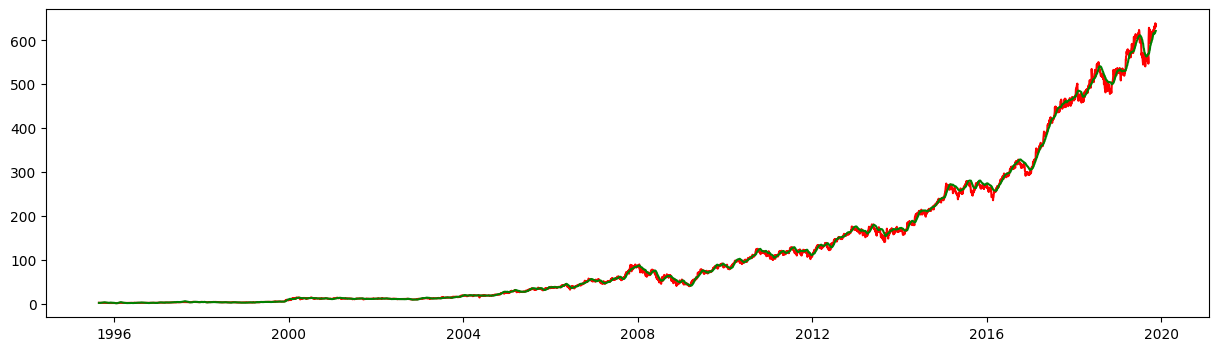

In [33]:
plt.figure(figsize=(15,4))
train_plot_idx = df.index[lookback : lookback + len(y_train_actual)]
plt.plot(train_plot_idx, y_train_actual, color='r', label='Actual Train')
plt.plot(train_plot_idx, y_pred_train_actual, color='g', label='Predicted Train')
plt.savefig('Actual vs Predicted Train.png')
plt.show()

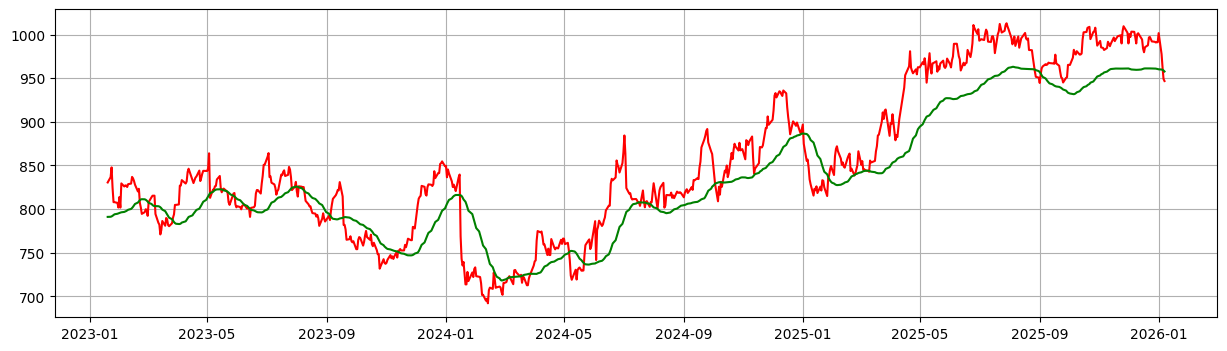

In [34]:
plt.figure(figsize=(15,4))
test_start_idx = val_end + lookback
test_plot_idx = df.index[test_start_idx : test_start_idx + len(y_test_actual)]
plt.plot(test_plot_idx, y_test_actual, color='r', label='Actual Test')
plt.plot(test_plot_idx, y_pred_test_actual, color='g', label='Predicted Test')
plt.savefig('Actual vs Predicted Test.png')
plt.grid()
plt.show()

In [35]:
import pickle
with open('Sclar.pkl','wb') as file:
    pickle.dump(sclar,file)

In [36]:
import os
import glob
import subprocess
import shutil
from datetime import datetime
from kaggle_secrets import UserSecretsClient

GITHUB_USERNAME = "Zalanemoj"
GITHUB_REPO = "General"
GITHUB_EMAIL = "zalanemoj777@gmail.com"
GITHUB_DIR = "Outputs_lstm-Attention-hdfc-prediction"
BRANCH = "main"

FILES_TO_PUSH = ["*.csv", "*.png", "*.jpg", "*.json","*.pkl"]
FOLDERS_TO_PUSH = ["*"]

TOKEN = UserSecretsClient().get_secret("GITHUB_TOKEN")
REPO_URL = f"https://{TOKEN}@github.com/{GITHUB_USERNAME}/{GITHUB_REPO}.git"

source = "/kaggle/working"
temp = "/kaggle/working/git_temp"

if os.path.exists(temp):
    shutil.rmtree(temp)
os.makedirs(temp)

os.chdir(temp)
subprocess.run(["git", "init"], capture_output=True)
subprocess.run(["git", "config", "user.email", GITHUB_EMAIL], capture_output=True)
subprocess.run(["git", "config", "user.name", GITHUB_USERNAME], capture_output=True)
subprocess.run(["git", "remote", "add", "origin", REPO_URL], capture_output=True)
subprocess.run(["git", "pull", "origin", BRANCH], capture_output=True)

target = os.path.join(temp, GITHUB_DIR)
os.makedirs(target, exist_ok=True)
IGNORE_FOLDERS = ["git_temp", ".virtual_documents", ".git"]
os.chdir(source)

print("Copying files:")
for pattern in FILES_TO_PUSH:
    for item in glob.glob(pattern):
        shutil.copy2(item, target)
        print(f"  ✓ {item}")

print("\nCopying folders:")
for pattern in FOLDERS_TO_PUSH:
    for folder in glob.glob(pattern):
        if any(ignored in folder for ignored in IGNORE_FOLDERS):
            continue

        if os.path.isdir(folder):
            dest = os.path.join(target, folder)
            if os.path.exists(dest):
                shutil.rmtree(dest)
            shutil.copytree(folder, dest)
            print(f"  ✓ {folder}/")

os.chdir(temp)
subprocess.run(["git", "add", "-A"], capture_output=True)
subprocess.run(["git", "commit", "-m", f"Update {datetime.now().strftime('%Y-%m-%d %H:%M')}"], capture_output=True)
subprocess.run(["git", "branch", "-M", BRANCH], capture_output=True)

result = subprocess.run(["git", "push", "-f", "origin", BRANCH], capture_output=True, text=True)

if result.returncode == 0:
    print(f"\n✅ Success! https://github.com/{GITHUB_USERNAME}/{GITHUB_REPO}/tree/{BRANCH}/{GITHUB_DIR}")
else:
    print(f"\n❌ Failed: {result.stderr}")

os.chdir(source)

Copying files:
  ✓ Actual vs Predicted Test.png
  ✓ Closing Price vs Years.png
  ✓ Bar chart Volume.png
  ✓ Closing Price vs Years with limit.png
  ✓ Actual vs Predicted Train.png
  ✓ Sclar.pkl

Copying folders:
  ✓ logs/

✅ Success! https://github.com/Zalanemoj/General/tree/main/Outputs_lstm-Attention-hdfc-prediction
